In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [4]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [5]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
mpalette = sns.color_palette(mpalette, n_colors=5)

morder= [morder[1]] + morder[3:]
mpalette= [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)


[(0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic']#, 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black']#, 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0)]

In [7]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [8]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [9]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = 'results'

In [10]:
os.listdir(dpath)

['monte_add_OVERFLOW_df.csv.gz',
 'monte_ponly_add_OVERFLOW_clean_df.csv.gz',
 'monte_ponly_clean_mse.csv.gz',
 'monte2_ponly_sum.csv.gz',
 'sensitivity_vmax2_df.csv.gz',
 'monte_ponly_clean_df.csv.gz',
 'monte_ponly_fix_OVERFLOW_df.csv.gz',
 'monte_het_minmse.csv.gz',
 'sensitivity_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_sum.csv.gz',
 'monte_add_het_mse.csv.gz',
 'monte_ponly_add_OVERFLOW_df.csv.gz',
 'monte_ponly_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_mse.csv.gz',
 'monte_ponly_fix_OVERFLOW_clean_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_df.csv.gz',
 'baseline_df.csv.gz',
 'results_old_26122023',
 'monte_het_clean_sum.csv.gz',
 'baseline_sum.csv.gz',
 'monte2_add_het_mse.csv.gz',
 'monte_strong_ponly_clean_df.csv.gz',
 'sensitivity_vmax2_sum.csv.gz',
 'monte_fix_OVERFLOW_mse.csv.gz',
 'monte_strong_ponly_sum.csv.gz',
 'monte_add_het_df.csv.gz',
 'sensitivity_vmax_mse.csv.gz',
 'monte_ponly_mse.csv.gz',
 'mon

In [11]:
pro99_mode = False 
which_organism = 'all'
organism_to_tune = 'HET'
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
) = get_constants_per_organism(pro99_mode, which_organism)
    


In [12]:
min_het_params_to_update, min_het_bounds, min_het_log_params = get_param_tuning_values('MIN', 'HET')
min_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values('MIN', 'PRO')


In [13]:
hparams = ['VmaxINh', 'VmaxOCh', 'VmaxONh', 'KINh', 'KOCh', 'KONh', 'Mh',
       'gammaDh', 
        'Koverflowh', 
 'KprodEXOh', 'KprodROSh', 'KlossROSh',
       'omegaH', ]

In [14]:
pparams = [
    'VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp',
    
    'Koverflowp', 'VmaxOCp',
       'VmaxONp', 'KOCp', 'KONp',
    'KprodROSp', 'KlossROSp', 'omegaP'
]

In [15]:
dpath = 'results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_add_het_clean_sum.csv.gz',))


In [16]:
minmse_df = pd.read_csv('ML_model/monte_add_het_predicted_classes.csv.gz')


In [17]:
minmse_df

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,10C0,Marinovum 5F3,Weak,5.205234,45.551143,74.0,237.104339,237.104339
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,10C0,Marinovum 5F3,Weak,4.224180,40.240316,74.0,169.982320,169.982320
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,1C0,Axenic,Axenic,4.316923,19.416927,74.0,83.821385,83.821385
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,1A0,Axenic,Axenic,10.445065,72.373841,74.0,755.949501,755.949501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_962,577132.0,3B0,Marinobacter adhaerens HP15,Inhibited,4.441409,36.724019,74.0,163.106382,163.106382
37513,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_979,337118.0,10C0,Marinovum 5F3,Weak,8.626213,87.630853,74.0,755.922358,755.922358
37514,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_980,630541.0,5x5_21B0,A. macleodii ATCC27126,Strong,21.008566,163.788072,74.0,3440.952569,3440.952569
37515,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_994,599984.0,1C0,Axenic,Axenic,9.761028,87.928855,74.0,858.276023,858.276023


In [18]:
minmse_df.VPRO

0        vpro_11_62_EXOENZYME_C1_20
1        vpro_11_62_EXOENZYME_C1_22
2        vpro_11_62_EXOENZYME_C1_54
3        vpro_11_62_EXOENZYME_C1_94
4        vpro_13_69_EXOENZYME_C1_28
                    ...            
37512         vpro_19_33_ROS_C0_962
37513         vpro_19_33_ROS_C0_979
37514         vpro_19_33_ROS_C0_980
37515         vpro_19_33_ROS_C0_994
37516         vpro_19_33_ROS_C0_999
Name: VPRO, Length: 37517, dtype: object

In [19]:
strong_and_sustained_vpros = set(minmse_df.loc[minmse_df.y_pred.isin(['Strong', 'Sustained']), 'VPRO'])
len(strong_and_sustained_vpros)

422

In [20]:
minmse_df.groupby('VPRO').y_pred.agg(lambda x : np.array2string(np.sort(x.unique()))).value_counts()


['Axenic' 'Weak']                                    325
['Axenic' 'Other' 'Sustained' 'Weak']                160
['Weak']                                             103
['Axenic' 'Other' 'Weak']                             94
['Axenic']                                            82
['Axenic' 'Sustained' 'Weak']                         64
['Axenic' 'Other' 'Sustained']                        53
['Axenic' 'Other' 'Strong' 'Sustained' 'Weak']        29
['Axenic' 'Other']                                    28
['Axenic' 'Other' 'Strong' 'Sustained']               28
['Other' 'Strong' 'Sustained' 'Weak']                 17
['Axenic' 'Other' 'Strong' 'Weak']                    13
['Other' 'Strong' 'Weak']                             12
['Axenic' 'Inhibited' 'Weak']                         11
['Other' 'Sustained' 'Weak']                          10
['Sustained' 'Weak']                                  10
['Other' 'Strong' 'Sustained']                         7
['Axenic' 'Sustained']         

In [21]:
sim_df = pd.merge(minmse_df, 
                  sim_df, 
                  on='run_id', how='left')

In [22]:
sim_df['Versatility'] = 'Not versatile'
sim_df.loc[sim_df.VPRO.isin(strong_and_sustained_vpros), 'Versatility'] = 'Versatile'
sim_df['Versatility'].value_counts()

Not versatile    21744
Versatile        15773
Name: Versatility, dtype: int64

In [23]:
sim_df

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0_x,...,ROSMode,KprodROSp,KprodROSh,KlossROSp,KlossROSh,KdecayROS,omegaP,omegaH,ROSmaxD,Versatility
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Not versatile
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Not versatile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_962,577132.0,...,1.0,3.023700e-08,1.146011e-07,3.316511e-07,0.000001,0.000003,0.000096,3.024117e-08,0.000032,Versatile
37513,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_979,337118.0,...,1.0,2.062347e-08,4.163231e-08,3.316511e-07,0.000010,0.000003,0.000034,7.194689e-08,0.000032,Not versatile
37514,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_980,630541.0,...,1.0,3.023700e-08,1.944444e-08,3.316511e-07,0.000010,0.000003,0.000034,3.405556e-08,0.000032,Versatile
37515,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_994,599984.0,...,1.0,3.023700e-08,5.702344e-09,3.316511e-07,0.000004,0.000003,0.000034,1.339949e-08,0.000032,Not versatile


In [24]:
sim_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0_x', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'Unnamed: 0_y', 'VmaxICp', 'VmaxICh', 'VmaxINp',
       'VmaxINh', 'VmaxOCp', 'VmaxOCh', 'VmaxONp', 'VmaxONh', 'KICp', 'KICh',
       'KINp', 'KINh', 'KOCp', 'KOCh', 'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp',
       'gammaDh', 'Rp', 'Rh', 'QCmaxp', 'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp',
       'Kmtbh', 'bp', 'bh', 'r0p', 'r0h', 'KdecayDON', 'KprodEXOp',
       'KprodEXOh', 'OverflowMode', 'Koverflowp', 'Koverflowh', 'ROSMode',
       'KprodROSp', 'KprodROSh', 'KlossROSp', 'KlossROSh', 'KdecayROS',
       'omegaP', 'omegaH', 'ROSmaxD', 'Versatility'],
      dtype='object')

In [25]:
sim_df = sim_df.reset_index(drop=True)

In [26]:
sim_df

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0_x,...,ROSMode,KprodROSp,KprodROSh,KlossROSp,KlossROSh,KdecayROS,omegaP,omegaH,ROSmaxD,Versatility
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Not versatile
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Versatile
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Not versatile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_962,577132.0,...,1.0,3.023700e-08,1.146011e-07,3.316511e-07,0.000001,0.000003,0.000096,3.024117e-08,0.000032,Versatile
37513,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_979,337118.0,...,1.0,2.062347e-08,4.163231e-08,3.316511e-07,0.000010,0.000003,0.000034,7.194689e-08,0.000032,Not versatile
37514,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_980,630541.0,...,1.0,3.023700e-08,1.944444e-08,3.316511e-07,0.000010,0.000003,0.000034,3.405556e-08,0.000032,Versatile
37515,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_994,599984.0,...,1.0,3.023700e-08,5.702344e-09,3.316511e-07,0.000004,0.000003,0.000034,1.339949e-08,0.000032,Not versatile


In [27]:
min_params = min_het_params_to_update + min_pro_params_to_update
min_params

['VmaxINh',
 'VmaxOCh',
 'VmaxONh',
 'KINh',
 'KOCh',
 'KONh',
 'Mh',
 'gammaDh',
 'VmaxICp',
 'VmaxINp',
 'KICp',
 'KINp',
 'Mp',
 'gammaDp']

In [28]:
#     resources* = paramkns / (paramvmax/paramM - 1)

sim_df['Vmax/K ICp'] = sim_df['VmaxICp'] / sim_df['KICp']
sim_df['Vmax/K INp'] = sim_df['VmaxINp'] / sim_df['KINp']
sim_df['R* INp'] = sim_df['KINp'] / (sim_df['VmaxINp'] / sim_df['Mp'] - 1)
sim_df['R* ICp'] = sim_df['KICp'] / (sim_df['VmaxICp'] / sim_df['Mp'] - 1)
sim_df['Vmax/Vmax Ip'] = sim_df['VmaxICp'] / sim_df['VmaxINp']



In [29]:
#     resources* = paramkns / (paramvmax/paramM - 1)

sim_df['Vmax/K OCh'] = sim_df['VmaxOCh'] / sim_df['KOCh']
sim_df['Vmax/K INh'] = sim_df['VmaxINh'] / sim_df['KINh']
sim_df['Vmax/K ONh'] = sim_df['VmaxONh'] / sim_df['KONh']
sim_df['R* INh'] = sim_df['KINh'] / (sim_df['VmaxINh'] / sim_df['Mh'] - 1)
sim_df['R* ONh'] = sim_df['KONh'] / (sim_df['VmaxONh'] / sim_df['Mh'] - 1)
sim_df['R* OCh'] = sim_df['KOCh'] / (sim_df['VmaxOCh'] / sim_df['Mh'] - 1)
sim_df['Vmax/Vmax Oh'] = sim_df['VmaxOCh'] / sim_df['VmaxONh']



In [30]:
sim_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0_x', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'Unnamed: 0_y', 'VmaxICp', 'VmaxICh', 'VmaxINp',
       'VmaxINh', 'VmaxOCp', 'VmaxOCh', 'VmaxONp', 'VmaxONh', 'KICp', 'KICh',
       'KINp', 'KINh', 'KOCp', 'KOCh', 'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp',
       'gammaDh', 'Rp', 'Rh', 'QCmaxp', 'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp',
       'Kmtbh', 'bp', 'bh', 'r0p', 'r0h', 'KdecayDON', 'KprodEXOp',
       'KprodEXOh', 'OverflowMode', 'Koverflowp', 'Koverflowh', 'ROSMode',
       'KprodROSp', 'KprodROSh', 'KlossROSp', 'KlossROSh', 'KdecayROS',
       'omegaP', 'omegaH', 'ROSmaxD', 'Versatility', 'Vmax/K ICp',
       'Vmax/K INp', 'R* INp', 'R* ICp', 'Vmax/Vmax Ip', 'Vmax/K OCh',
       'Vmax/K INh', 'Vmax/K ONh', 'R* INh', 'R* ONh', 'R* OCh',
       'Vmax/Vmax Oh'],
      dtype='object')

In [31]:
additional_variables = [ 
    'Vmax/K ICp', 'Vmax/K INp', 'R* INp', 'R* ICp', 'Vmax/Vmax Ip',
    'Vmax/K OCh', 'Vmax/K INh',
    'Vmax/K ONh', 'R* INh', 'R* ONh', 'R* OCh', 'Vmax/Vmax Oh'
]
#id_vars= ['model', 'run_id', 'y_pred', 'VPRO']
id_vars=['Sample', 'full name', 'Group', 'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'y_pred',
       'compare_points', 'RMSE', 'run_id', 'model', 'VPRO', 'Versatility'
       ]
sim_df1 = sim_df.drop_duplicates(subset='run_id')
def _get_params_df(model):
    hparams_to_update, hbounds, hlog_params = get_param_tuning_values(model, 'HET')
    pparams_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    params_to_update = hparams_to_update + pparams_to_update
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in params_to_update if p in sim_df1.columns]
#    params_to_update = [p for p in params_to_update if p not  in ['E_leakp', 'E_leakh']]
    additional_variables_per_day = []
#         f'{p}_day' for p in params_per_second 
#         if p in params_to_update
#     ]
    additional_variables_per_day_cell =  []
#         f'{p}_day_cell' for p in vmax_params
#         if p in params_to_update
#     ]
    


    param_vals_df = sim_df1.loc[sim_df1.model.isin([model]), 
                                id_vars + params_to_update + additional_variables_per_day + additional_variables + additional_variables_per_day_cell]
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)
    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in morder], ignore_index=True)

In [32]:
sim_df_vpro = sim_df.drop_duplicates(['VPRO', 'y_pred'])

In [33]:
sim_df_vpro

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0_x,...,R* INp,R* ICp,Vmax/Vmax Ip,Vmax/K OCh,Vmax/K INh,Vmax/K ONh,R* INh,R* ONh,R* OCh,Vmax/Vmax Oh
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,...,0.023182,10.547308,1.314382,0.000311,0.000890,0.004862,0.002481,0.000418,0.006691,0.359137
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,...,0.009834,7.195059,1.752697,0.000203,0.022541,0.009785,0.000016,0.000036,0.001756,0.568489
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,...,0.006059,43.795054,1.560441,0.000170,0.002357,0.003278,0.000503,0.000359,0.006912,1.000000
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,...,0.010997,5.269899,3.628373,0.000667,0.012368,0.000121,0.000397,0.065767,0.007781,5.495780
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,...,0.000774,24.656906,0.455868,0.000129,0.014136,0.000977,0.000057,0.000831,0.006723,0.042296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36832,monteadd_ROS_94_monte_vpro_19_33_ROS_C0_167_11...,Axenic,0.352821,monteadd_ROS_94_monte_vpro_19_33_ROS_C0_167_11,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_167,314114.0,...,0.000122,0.363601,1.432361,0.000104,0.014494,0.000667,0.000081,0.001767,0.011904,0.251308
37014,monteadd_ROS_95_monte_vpro_19_33_ROS_C0_936_53...,Inhibited,0.855821,monteadd_ROS_95_monte_vpro_19_33_ROS_C0_936_53,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_936,662233.0,...,0.002123,11.336619,1.432361,0.000346,0.003333,0.000667,0.003257,0.016285,0.114436,0.183314
37275,monteadd_ROS_98_monte_vpro_19_33_ROS_C0_47_7_l...,Sustained,0.791488,monteadd_ROS_98_monte_vpro_19_33_ROS_C0_47_7,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_47,534062.0,...,0.000109,1.045981,1.432361,0.000499,0.003333,0.003479,0.000353,0.000334,0.002359,0.191644
37445,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_19_2_lo...,Axenic,0.296747,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_19_2,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_19,521360.0,...,0.000028,0.601420,1.432361,0.000696,0.003161,0.016980,0.000144,0.000027,0.000652,0.138254


In [34]:
additional_variables = [ 'Vmax/K ICp', 'Vmax/K INp', 'R* INp', 'R* ICp', 'Vmax/Vmax Ip']
#id_vars= ['model', 'run_id', 'y_pred', 'VPRO']
id_vars=['Sample', 'full name', 'Group', 'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]',
       'compare_points', 'RMSE', 'run_id', 'model', 'VPRO', 'y_pred', 'Versatility'
       ]
def _get_vpro_params_df(model):
    params_to_update, pbounds, plog_params = get_param_tuning_values(model, 'PRO')
    param_vals_map = get_param_vals(model)
    
    params_to_update = [p for p in params_to_update if p in sim_df_vpro.columns]
    params_to_update = [p for p in params_to_update if p not  in ['E_leakp', 'E_leakh']]
    additional_variables_per_day = []
#         f'{p}_day' for p in params_per_second 
#         if p in params_to_update
#     ]
    additional_variables_per_day_cell =  []
#         f'{p}_day_cell' for p in vmax_params
#         if p in params_to_update
#     ]
    


    param_vals_df = sim_df_vpro.loc[sim_df_vpro.model.isin([model]), 
                                id_vars + params_to_update + additional_variables_per_day + additional_variables + additional_variables_per_day_cell]
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)
    return mparam_vals
mvparams_df = pd.concat([_get_vpro_params_df(model) for model in morder], ignore_index=True)

In [35]:
mvparams_df

,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,run_id,model,VPRO,y_pred,Versatility,variable,value,default,FC
0,11A0,Roseovarius 5C3,Weak,3.628002,28.574999,74.0,103.670160,monteadd_OVERFLOW_101_monte_vpro_2_10_14_OVERF...,OVERFLOW,vpro_2_10_14_OVERFLOW_24,Weak,Not versatile,VmaxICp,0.000039,0.000006,2.806598
1,10C0,Marinovum 5F3,Weak,5.120280,52.622867,74.0,269.443831,monteadd_OVERFLOW_101_monte_vpro_2_10_14_OVERF...,OVERFLOW,vpro_2_10_14_OVERFLOW_31,Weak,Versatile,VmaxICp,0.000039,0.000006,2.806598
2,10C0,Marinovum 5F3,Weak,6.867984,69.834590,74.0,479.622839,monteadd_OVERFLOW_101_monte_vpro_2_10_14_OVERF...,OVERFLOW,vpro_2_10_14_OVERFLOW_41,Weak,Versatile,VmaxICp,0.000039,0.000006,2.806598
3,10C0,Marinovum 5F3,Weak,1.009337,8.963132,74.0,9.046817,monteadd_OVERFLOW_101_monte_vpro_2_10_14_OVERF...,OVERFLOW,vpro_2_10_14_OVERFLOW_72,Weak,Not versatile,VmaxICp,0.000039,0.000006,2.806598
4,1A0,Axenic,Axenic,9.134516,60.394865,74.0,551.677832,monteadd_OVERFLOW_101_monte_vpro_2_10_14_OVERF...,OVERFLOW,vpro_2_10_14_OVERFLOW_90,Axenic,Not versatile,VmaxICp,0.000039,0.000006,2.806598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32950,1C0,Axenic,Axenic,7.986532,78.605145,74.0,627.782548,monteadd_ROS_94_monte_vpro_19_33_ROS_C0_167_11...,ROS,vpro_19_33_ROS_C0_167,Axenic,Versatile,Vmax/Vmax Ip,1.432361,NaN,NaN
32951,4B0,Phaeobacter gallaeciensis,Inhibited,0.725205,10.942819,74.0,7.935789,monteadd_ROS_95_monte_vpro_19_33_ROS_C0_936_53...,ROS,vpro_19_33_ROS_C0_936,Inhibited,Not versatile,Vmax/Vmax Ip,1.432361,NaN,NaN
32952,6C0,Ruegeria pomeroyi,Sustained,12.177195,117.014437,74.0,1424.907584,monteadd_ROS_98_monte_vpro_19_33_ROS_C0_47_7_l...,ROS,vpro_19_33_ROS_C0_47,Sustained,Versatile,Vmax/Vmax Ip,1.432361,NaN,NaN
32953,1C0,Axenic,Axenic,7.701471,71.080734,74.0,547.426200,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_19_2_lo...,ROS,vpro_19_33_ROS_C0_19,Axenic,Versatile,Vmax/Vmax Ip,1.432361,NaN,NaN


In [36]:
sim_df

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0_x,...,R* INp,R* ICp,Vmax/Vmax Ip,Vmax/K OCh,Vmax/K INh,Vmax/K ONh,R* INh,R* ONh,R* OCh,Vmax/Vmax Oh
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_20,710504.0,...,0.023182,10.547308,1.314382,0.000311,0.000890,0.004862,0.002481,0.000418,0.006691,0.359137
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_22,717797.0,...,0.009834,7.195059,1.752697,0.000203,0.022541,0.009785,0.000016,0.000036,0.001756,0.568489
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_54,NaN,...,0.006059,43.795054,1.560441,0.000170,0.002357,0.003278,0.000503,0.000359,0.006912,1.000000
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1_94,701930.0,...,0.010997,5.269899,3.628373,0.000667,0.012368,0.000121,0.000397,0.065767,0.007781,5.495780
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1_28,711639.0,...,0.000774,24.656906,0.455868,0.000129,0.014136,0.000977,0.000057,0.000831,0.006723,0.042296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_962,577132.0,...,0.001296,0.210606,1.432361,0.000521,0.000497,0.000667,0.002368,0.001767,0.002346,0.323438
37513,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_979,337118.0,...,0.000164,5.797641,1.432361,0.001601,0.006189,0.001010,0.001951,0.013479,0.008693,0.893375
37514,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_980,630541.0,...,0.000024,0.080479,1.432361,0.000246,0.006684,0.010064,0.000176,0.000116,0.004937,0.163535
37515,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_994,599984.0,...,0.000126,9.751917,1.167867,0.004061,0.003453,0.005476,0.000071,0.000044,0.000060,0.772213


In [37]:
sim_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Unnamed: 0_x', 'Sample', 'full name', 'Group',
       'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'Unnamed: 0_y', 'VmaxICp', 'VmaxICh', 'VmaxINp',
       'VmaxINh', 'VmaxOCp', 'VmaxOCh', 'VmaxONp', 'VmaxONh', 'KICp', 'KICh',
       'KINp', 'KINh', 'KOCp', 'KOCh', 'KONp', 'KONh', 'Mp', 'Mh', 'gammaDp',
       'gammaDh', 'Rp', 'Rh', 'QCmaxp', 'QCminp', 'QCmaxh', 'QCminh', 'Kmtbp',
       'Kmtbh', 'bp', 'bh', 'r0p', 'r0h', 'KdecayDON', 'KprodEXOp',
       'KprodEXOh', 'OverflowMode', 'Koverflowp', 'Koverflowh', 'ROSMode',
       'KprodROSp', 'KprodROSh', 'KlossROSp', 'KlossROSh', 'KdecayROS',
       'omegaP', 'omegaH', 'ROSmaxD', 'Versatility', 'Vmax/K ICp',
       'Vmax/K INp', 'R* INp', 'R* ICp', 'Vmax/Vmax Ip', 'Vmax/K OCh',
       'Vmax/K INh', 'Vmax/K ONh', 'R* INh', 'R* ONh', 'R* OCh',
       'Vmax/Vmax Oh'],
      dtype='object')

In [38]:
morder

['OVERFLOW', 'EXOENZYME', 'ROS']

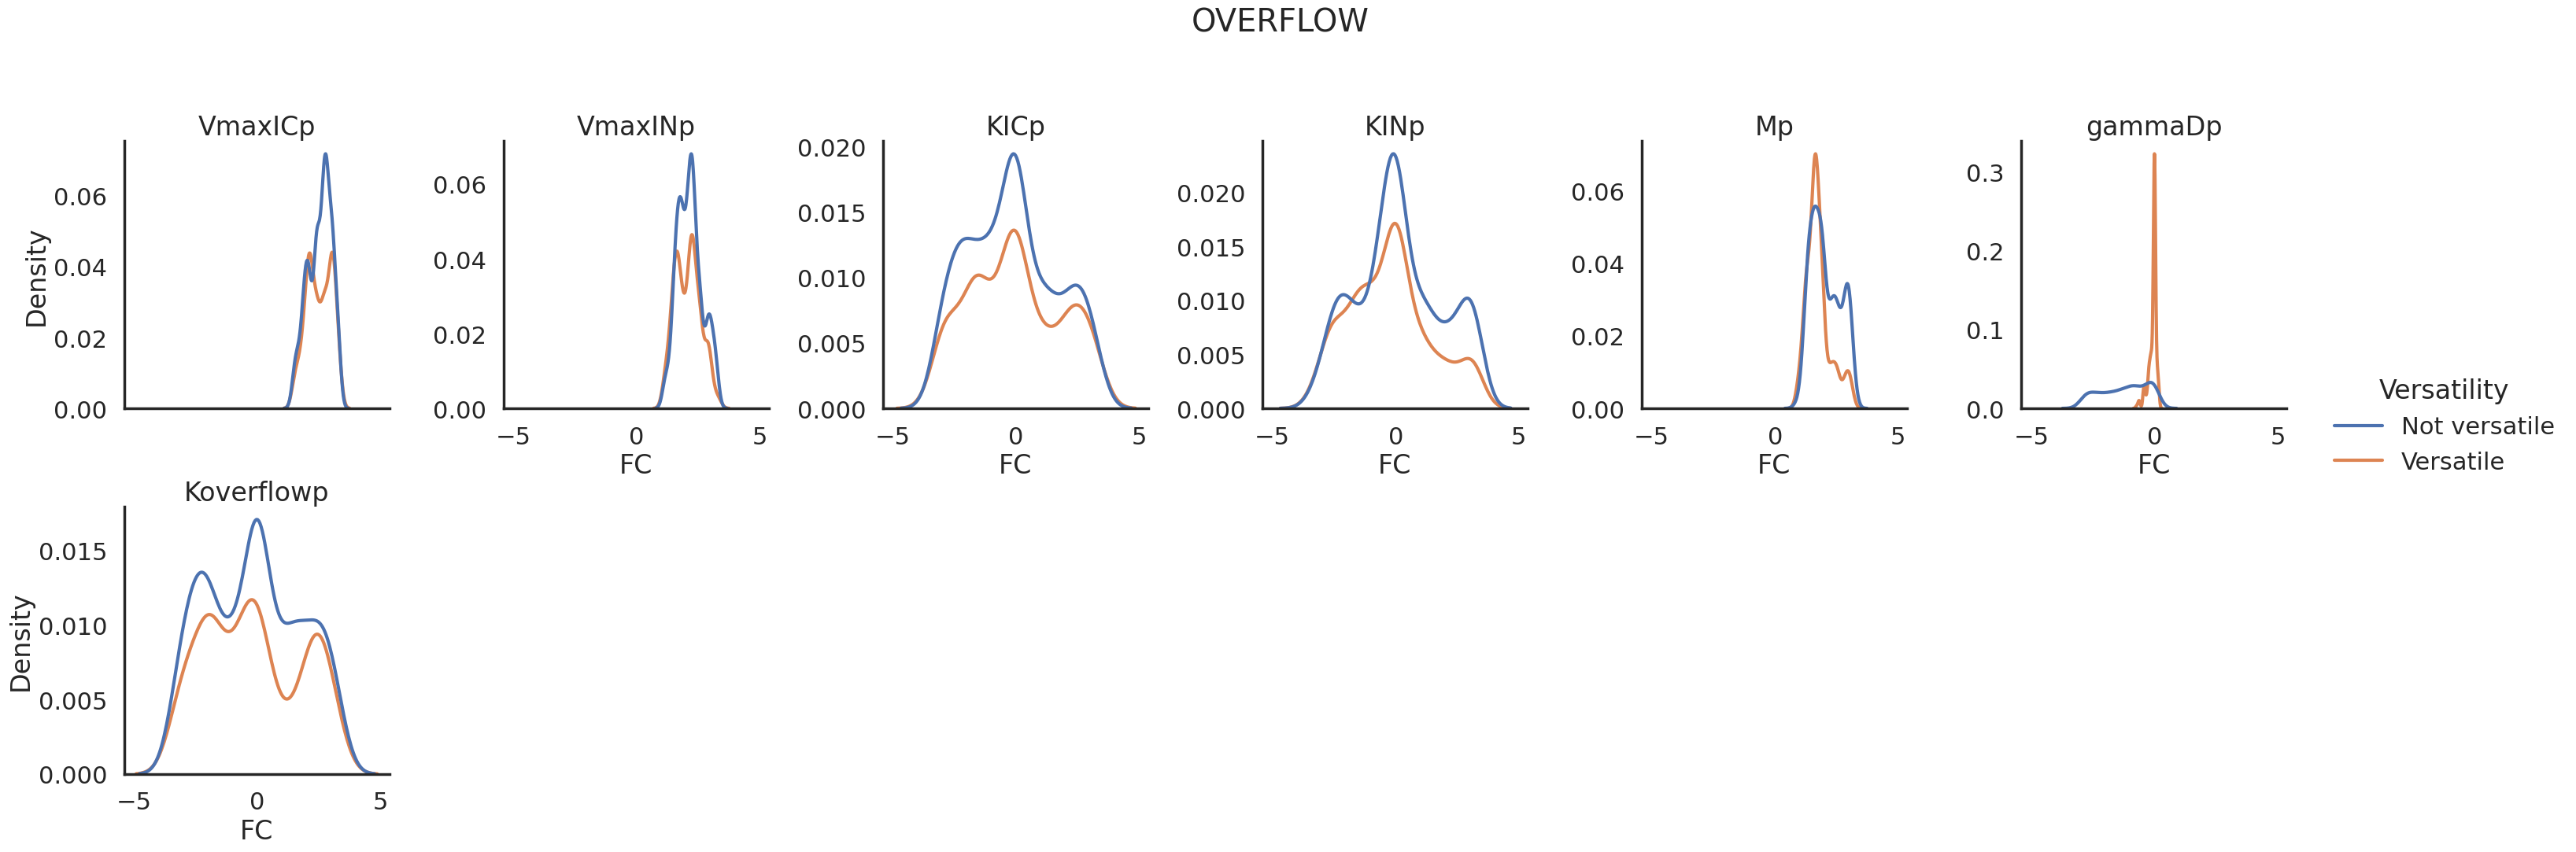

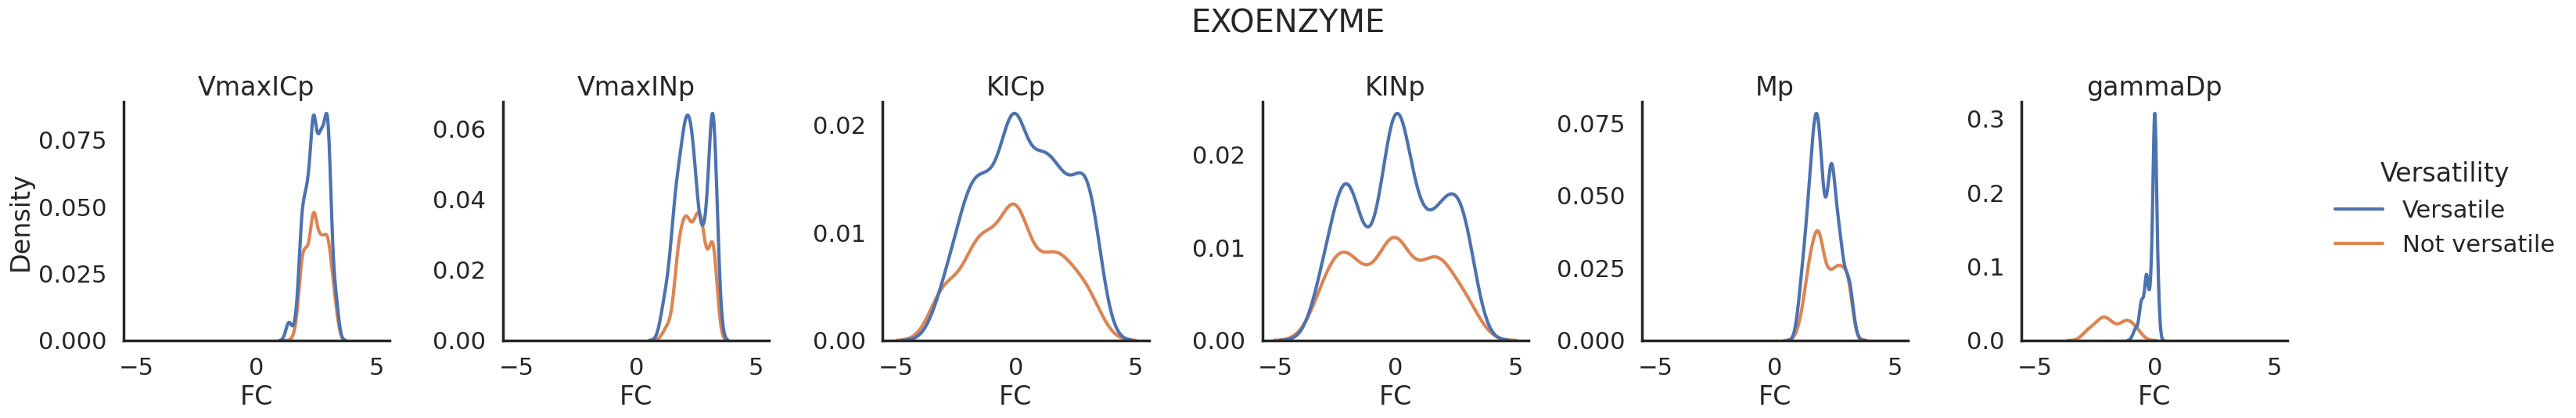

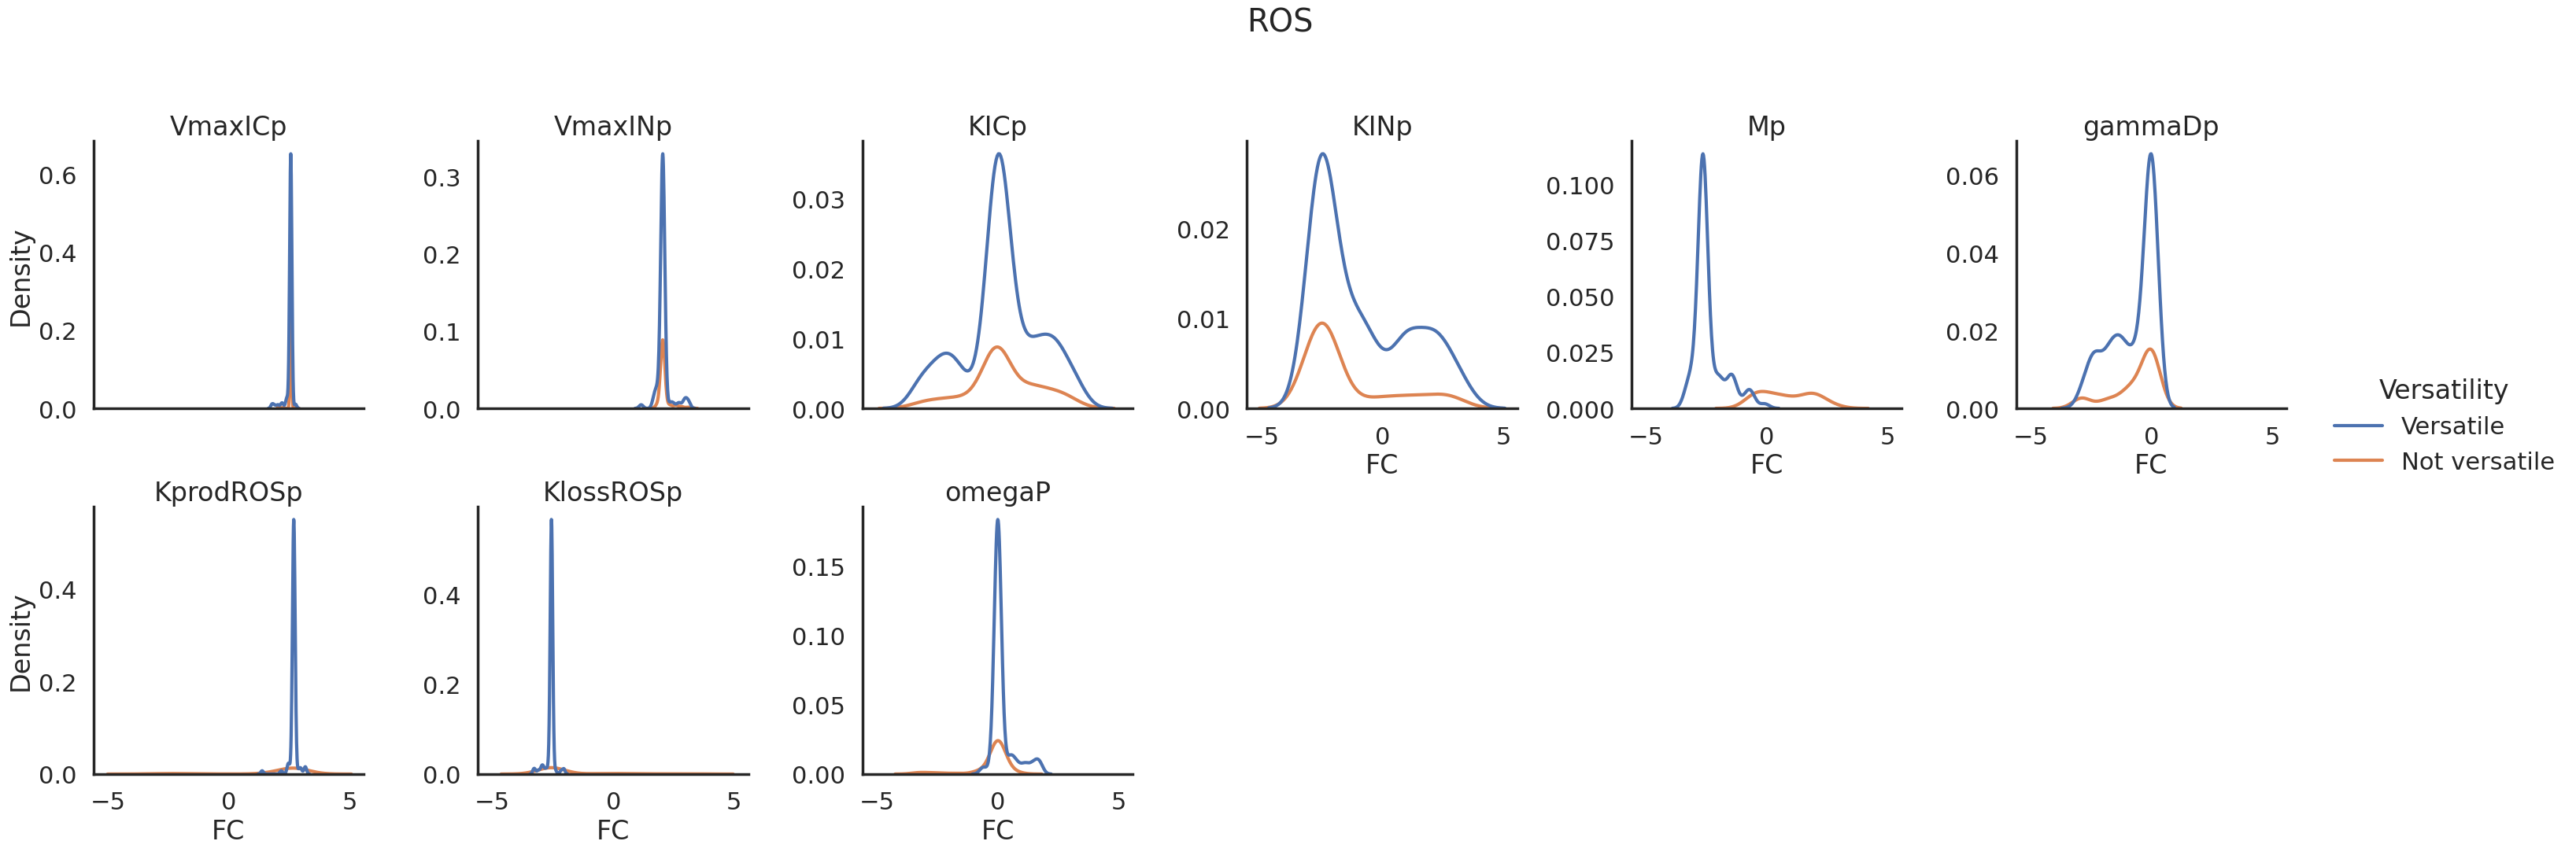

In [49]:
sns.set_context('poster')
for model in morder:
    cur_het_params_to_update, min_het_bounds, min_het_log_params = get_param_tuning_values(model, 'HET')
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    sns.displot(
        data=mvparams_df.loc[ 
            ~mvparams_df['FC'].isna() & 
            mvparams_df['variable'].isin(cur_pro_params_to_update) &
            mvparams_df['model'].isin([model]) 

                           ].reset_index(), 
        col='variable', x='FC', col_wrap=6, #order=gorder,
        hue='Versatility', #hue_order=gorder, palette=gpalette,
        kind='kde',
        facet_kws=dict(sharey=False),
        col_order=cur_pro_params_to_update,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(model, y=1.1)

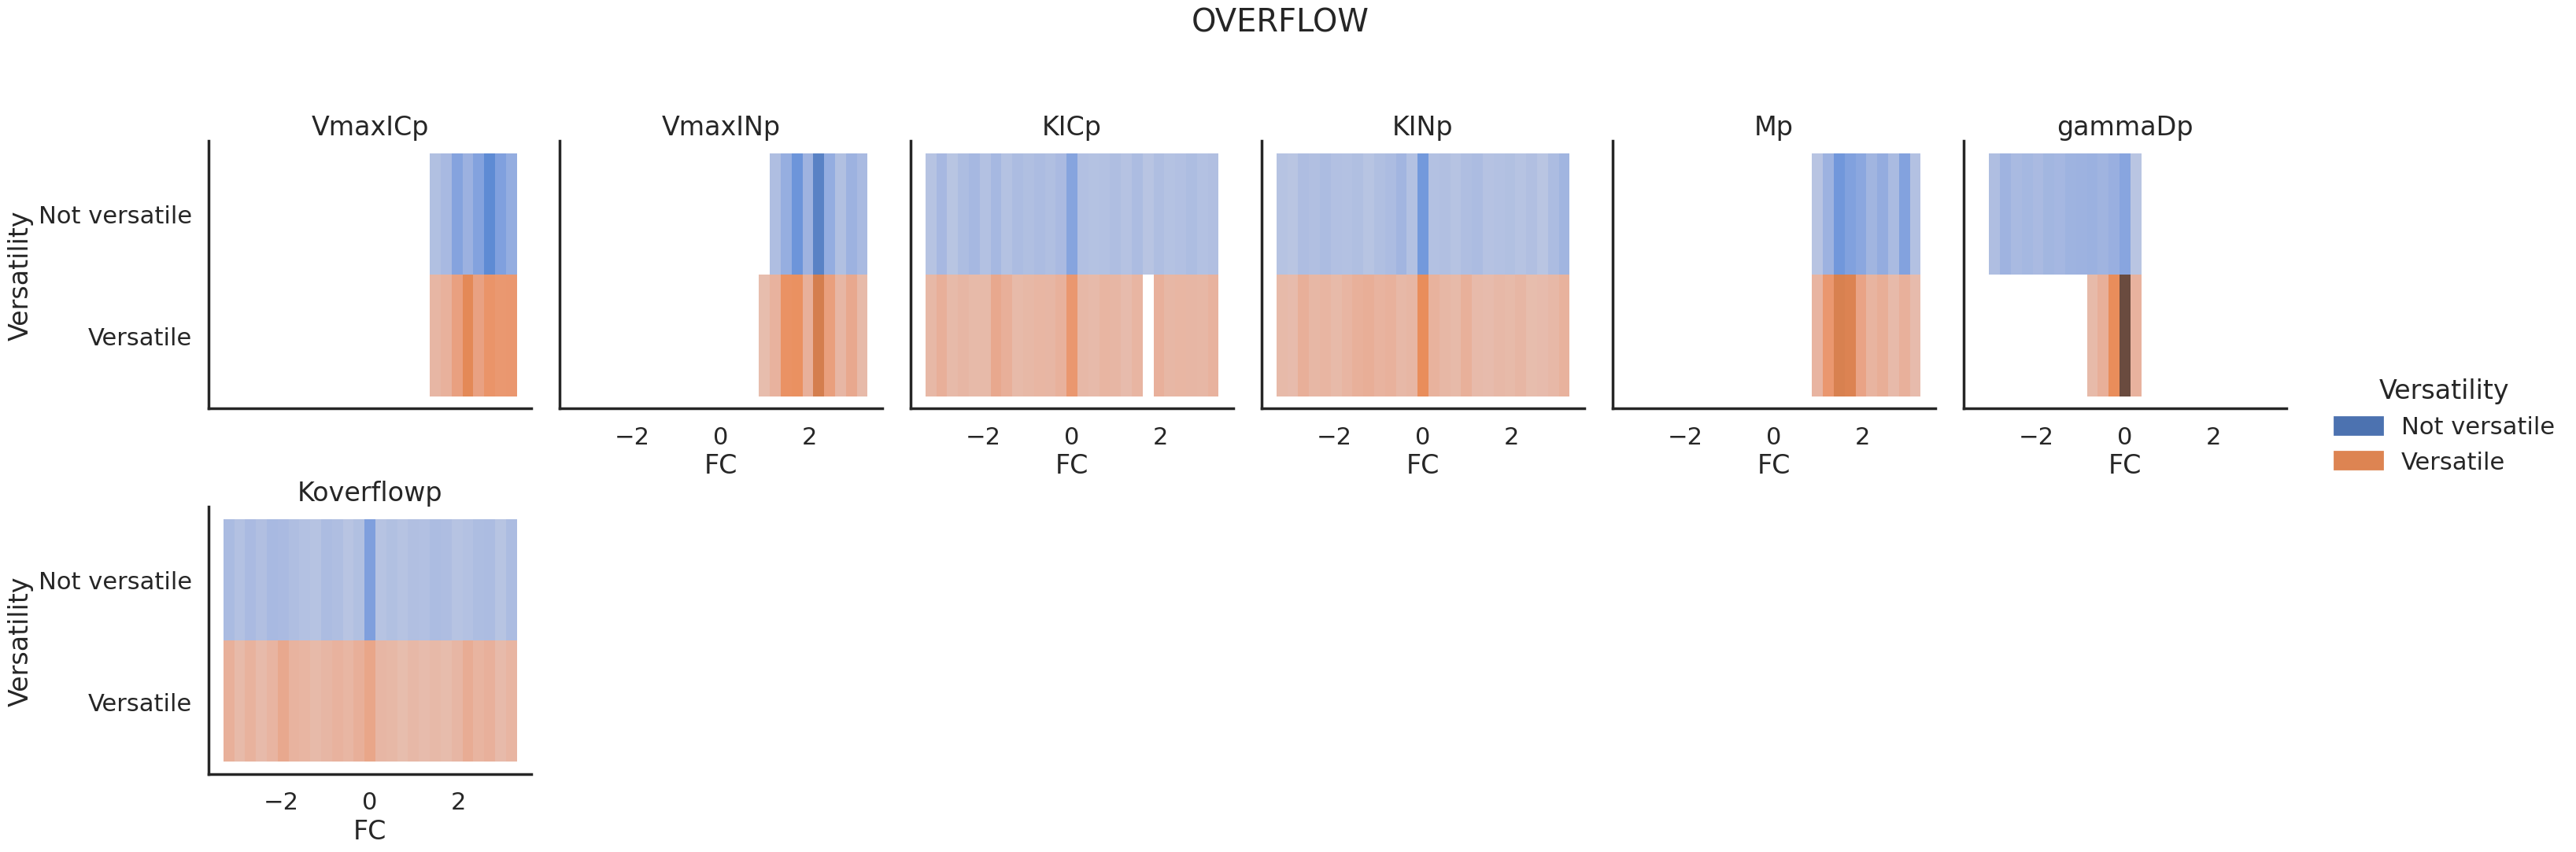

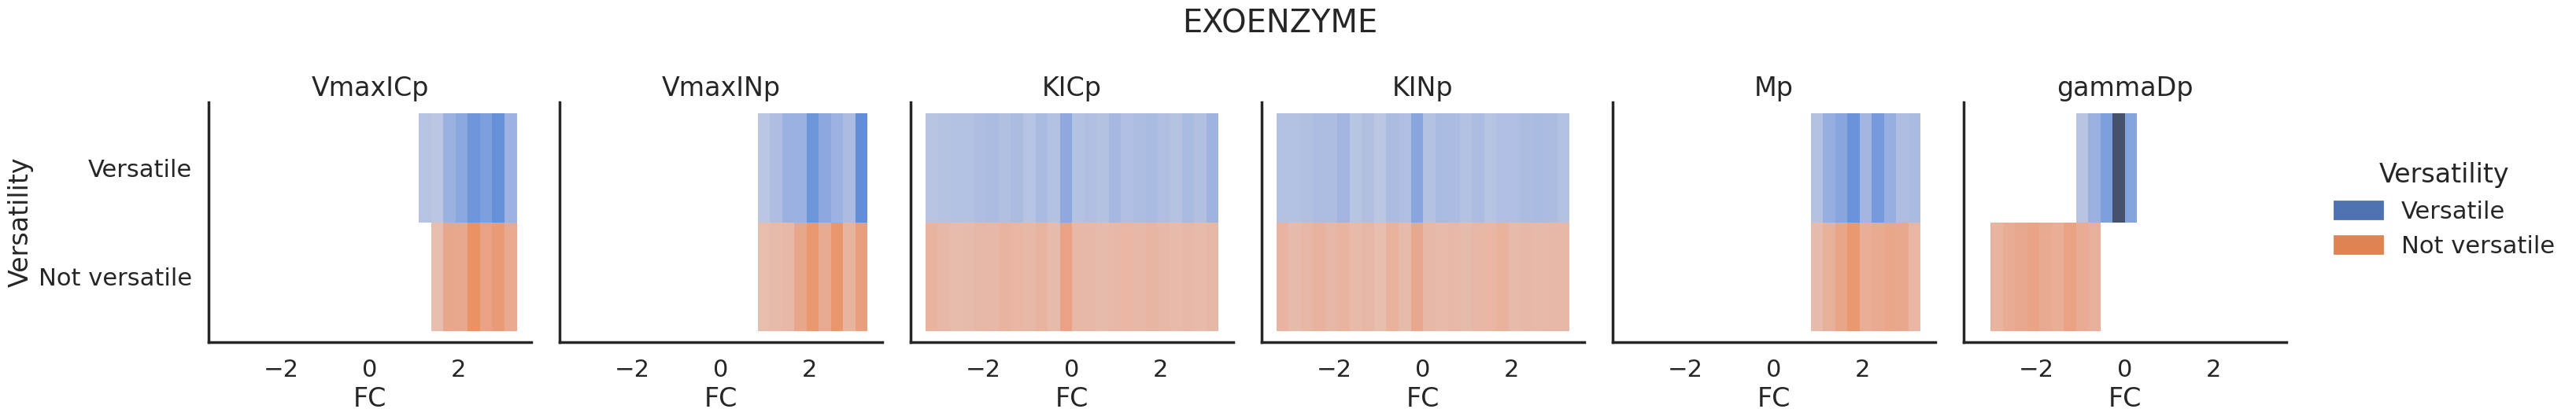

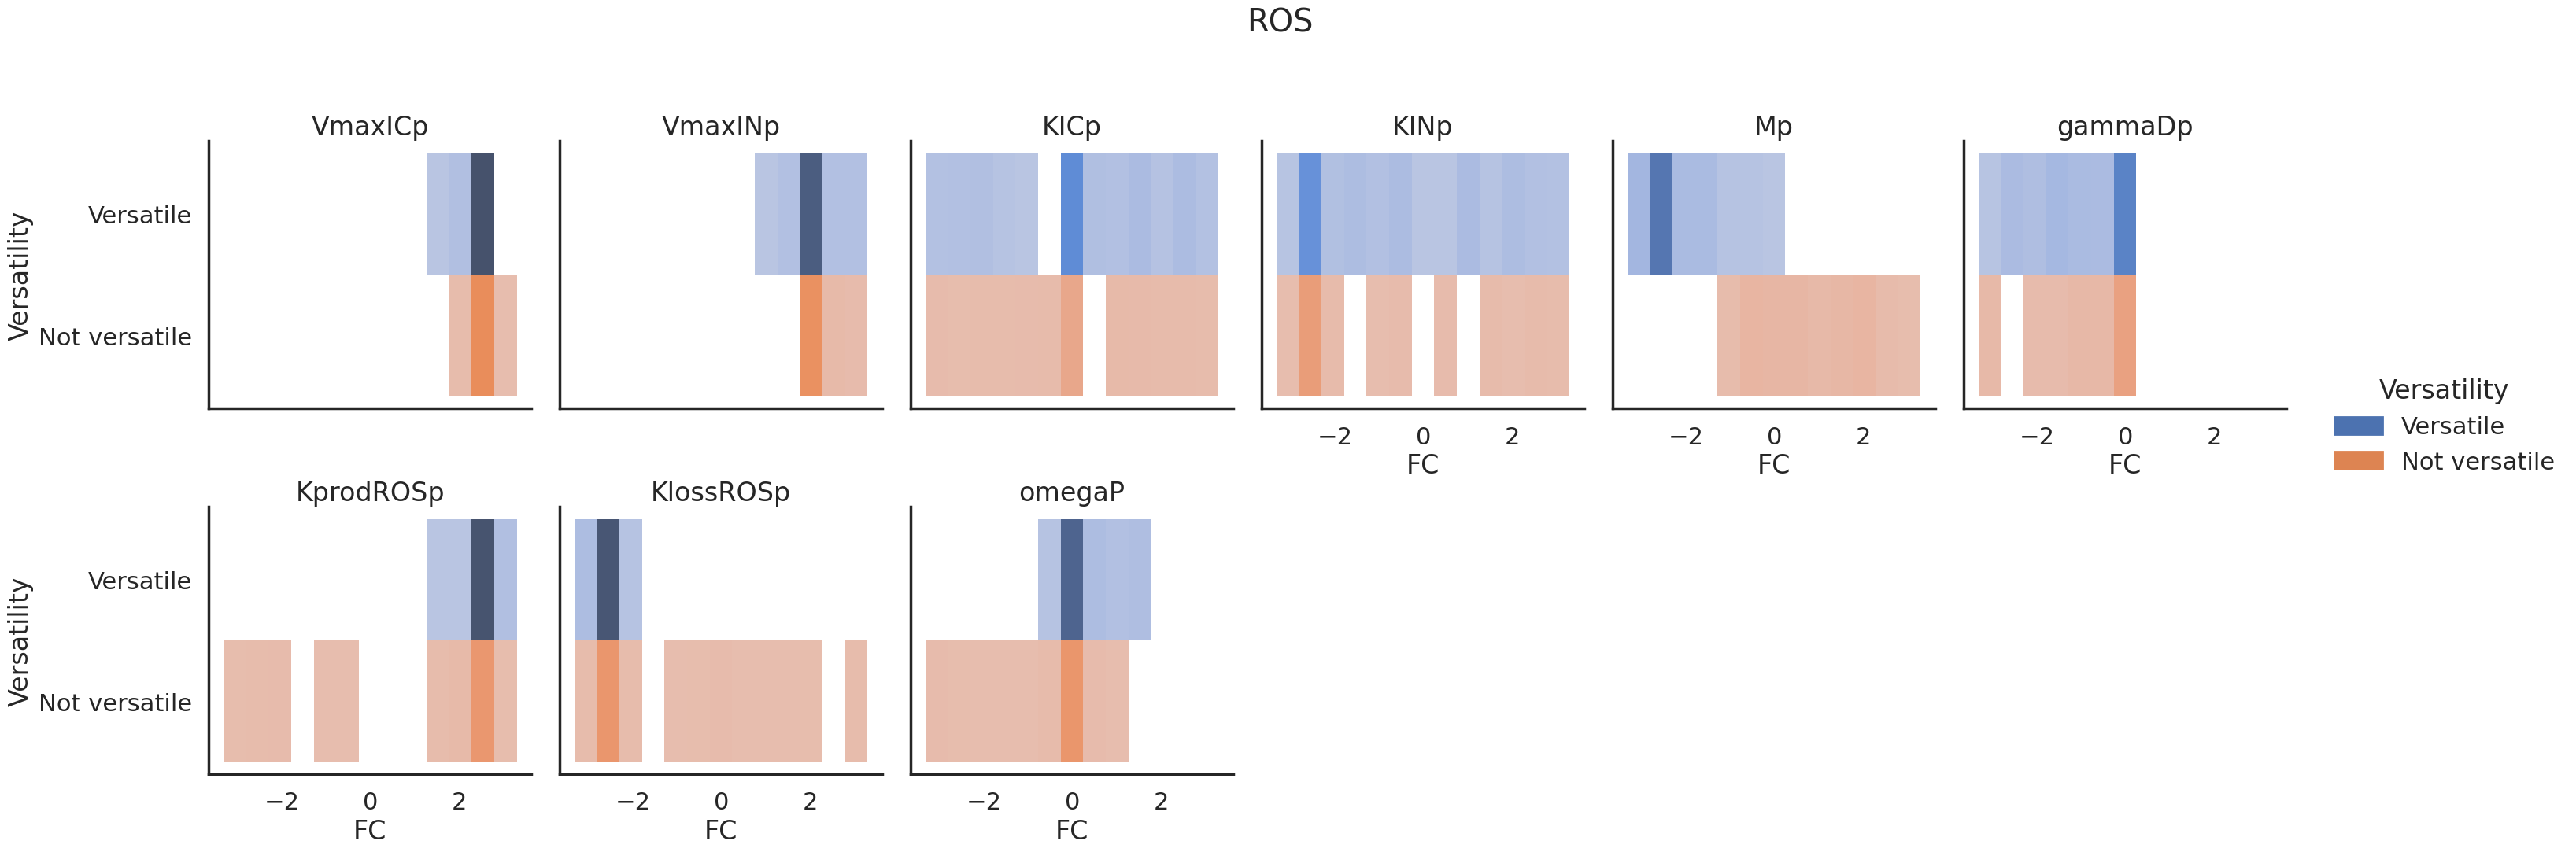

In [40]:
sns.set_context('poster')
for model in morder:
    cur_het_params_to_update, min_het_bounds, min_het_log_params = get_param_tuning_values(model, 'HET')
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    sns.displot(
        data=mvparams_df.loc[ 
            ~mvparams_df['FC'].isna() & 
            mvparams_df['variable'].isin(cur_pro_params_to_update) &
            mvparams_df['model'].isin([model]) 

                           ].reset_index(), 
        col='variable', x='FC', col_wrap=6, #order=gorder,
        hue='Versatility', #hue_order=gorder, palette=gpalette,
        y= 'Versatility',
        col_order=cur_pro_params_to_update,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(model, y=1.1)

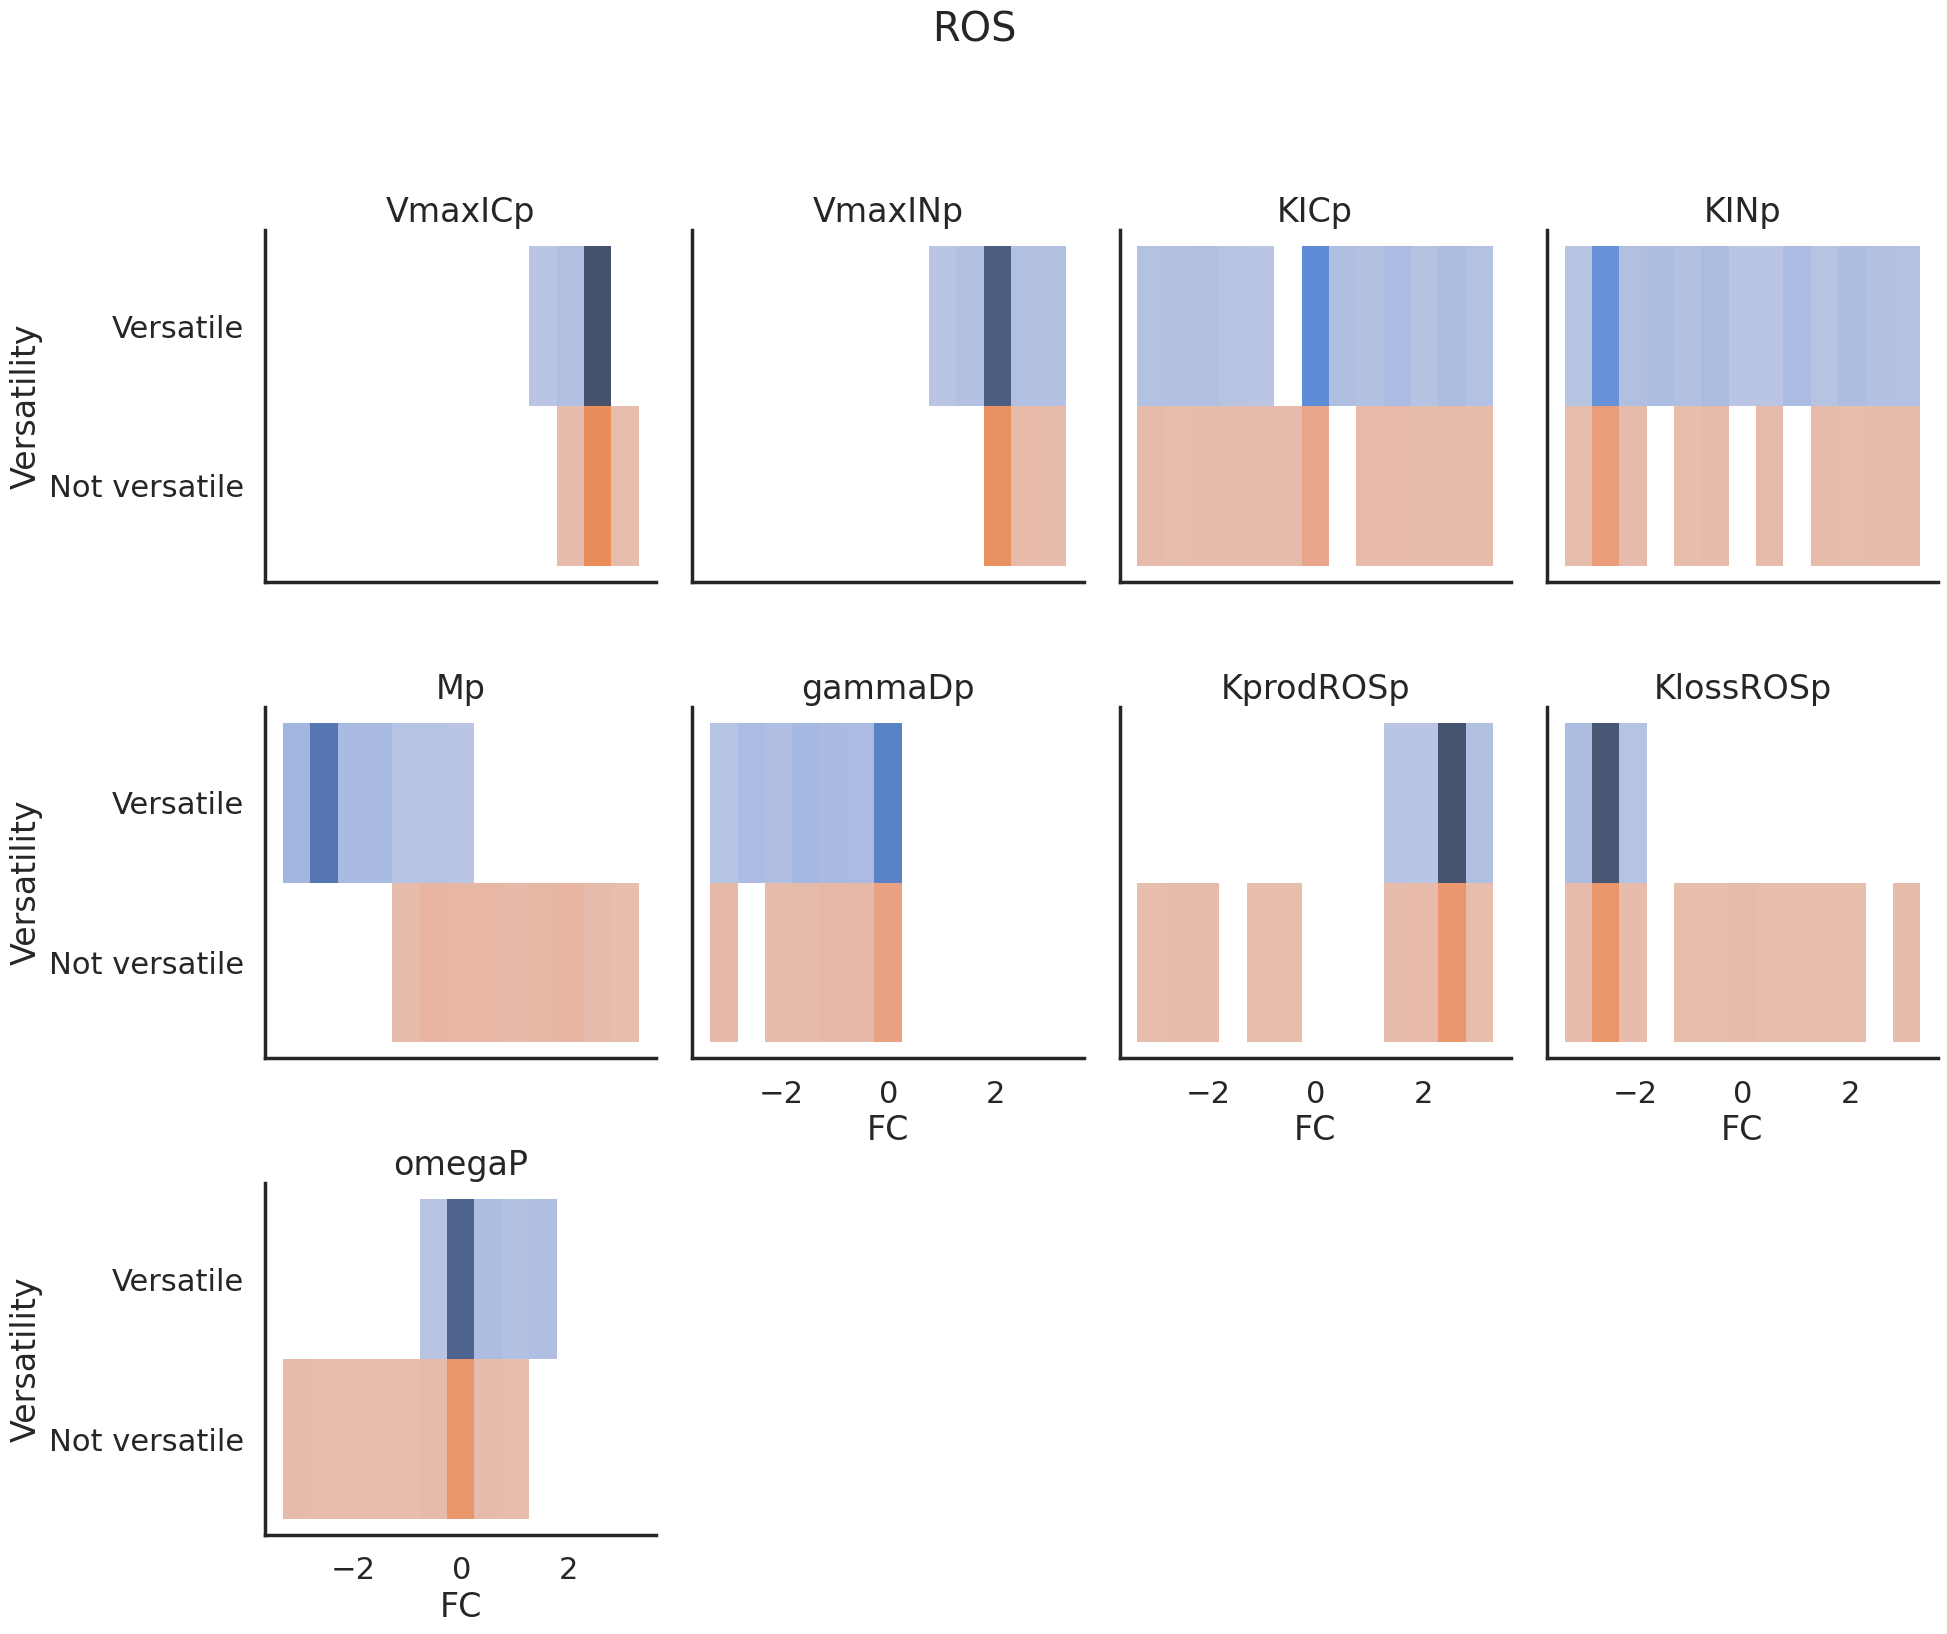

In [41]:
sns.set_context('poster')
for model in ['ROS']:
    cur_het_params_to_update, min_het_bounds, min_het_log_params = get_param_tuning_values(model, 'HET')
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    sns.displot(
        data=mvparams_df.loc[ 
            ~mvparams_df['FC'].isna() & 
            mvparams_df['variable'].isin(cur_pro_params_to_update) &
            mvparams_df['model'].isin([model]) 

                           ].reset_index(), 
        col='variable', x='FC', col_wrap=4, #order=gorder,
        hue='Versatility', #hue_order=gorder, palette=gpalette,
        y= 'Versatility',
        legend=False,
        col_order=cur_pro_params_to_update,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(model, y=1.1)

/tmp/ipykernel_216893/2918454600.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
/tmp/ipykernel_216893/2918454600.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
/tmp/ipykernel_216893/2918454600.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


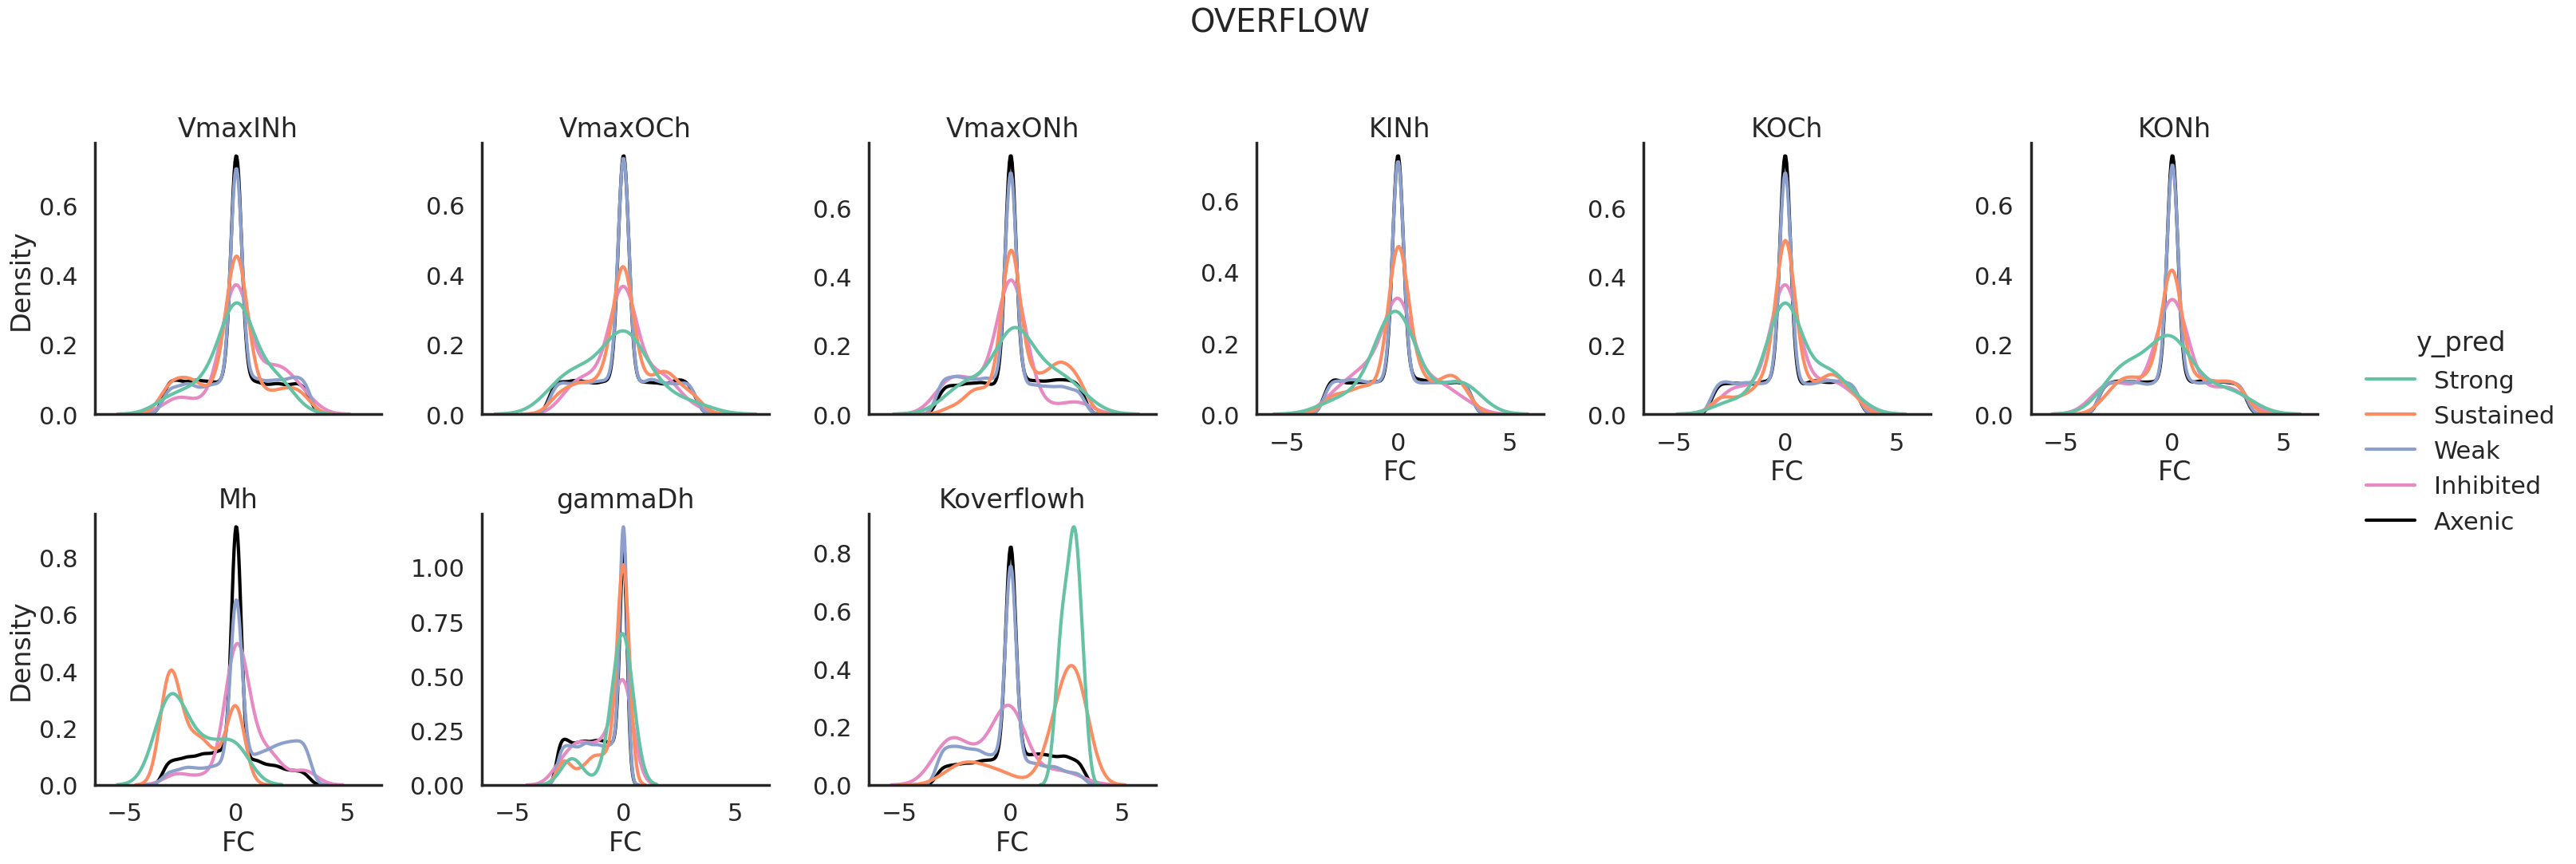

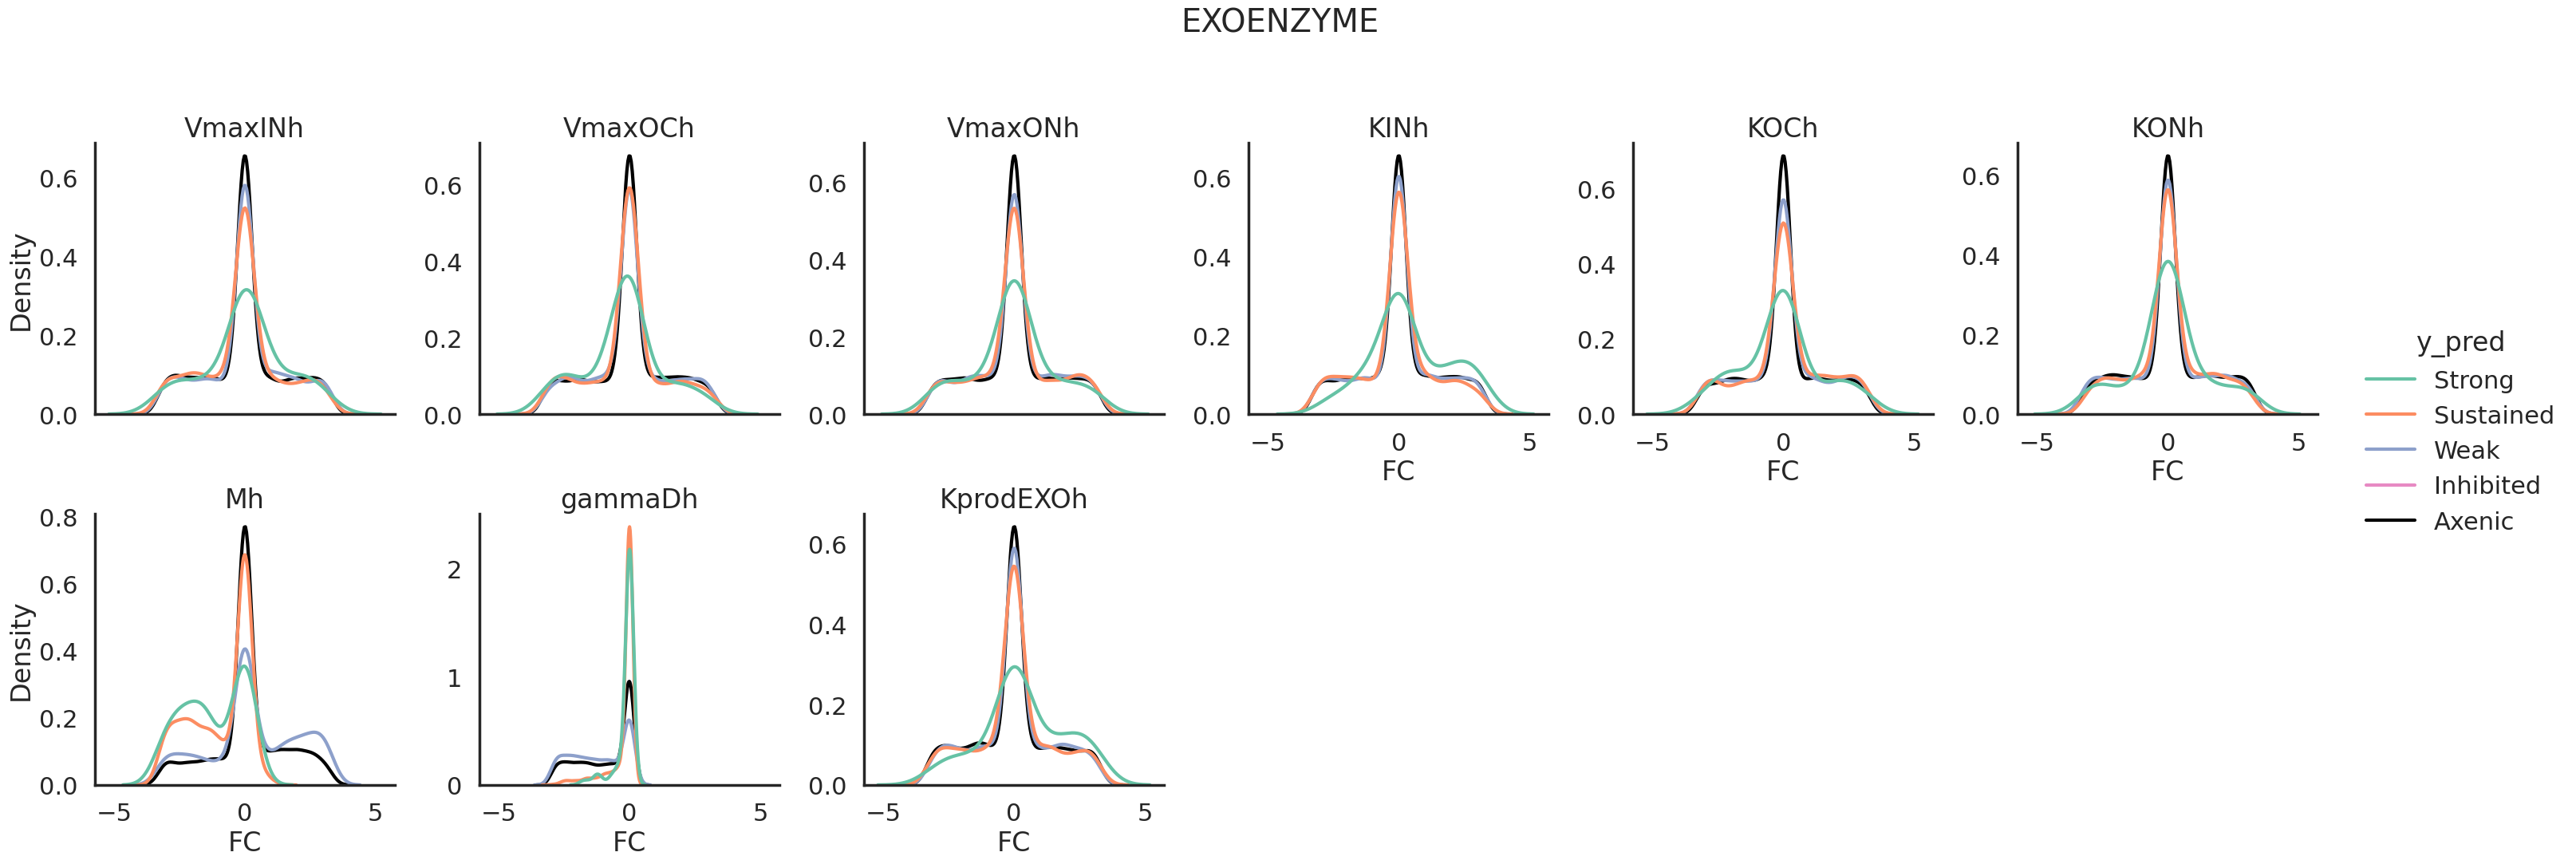

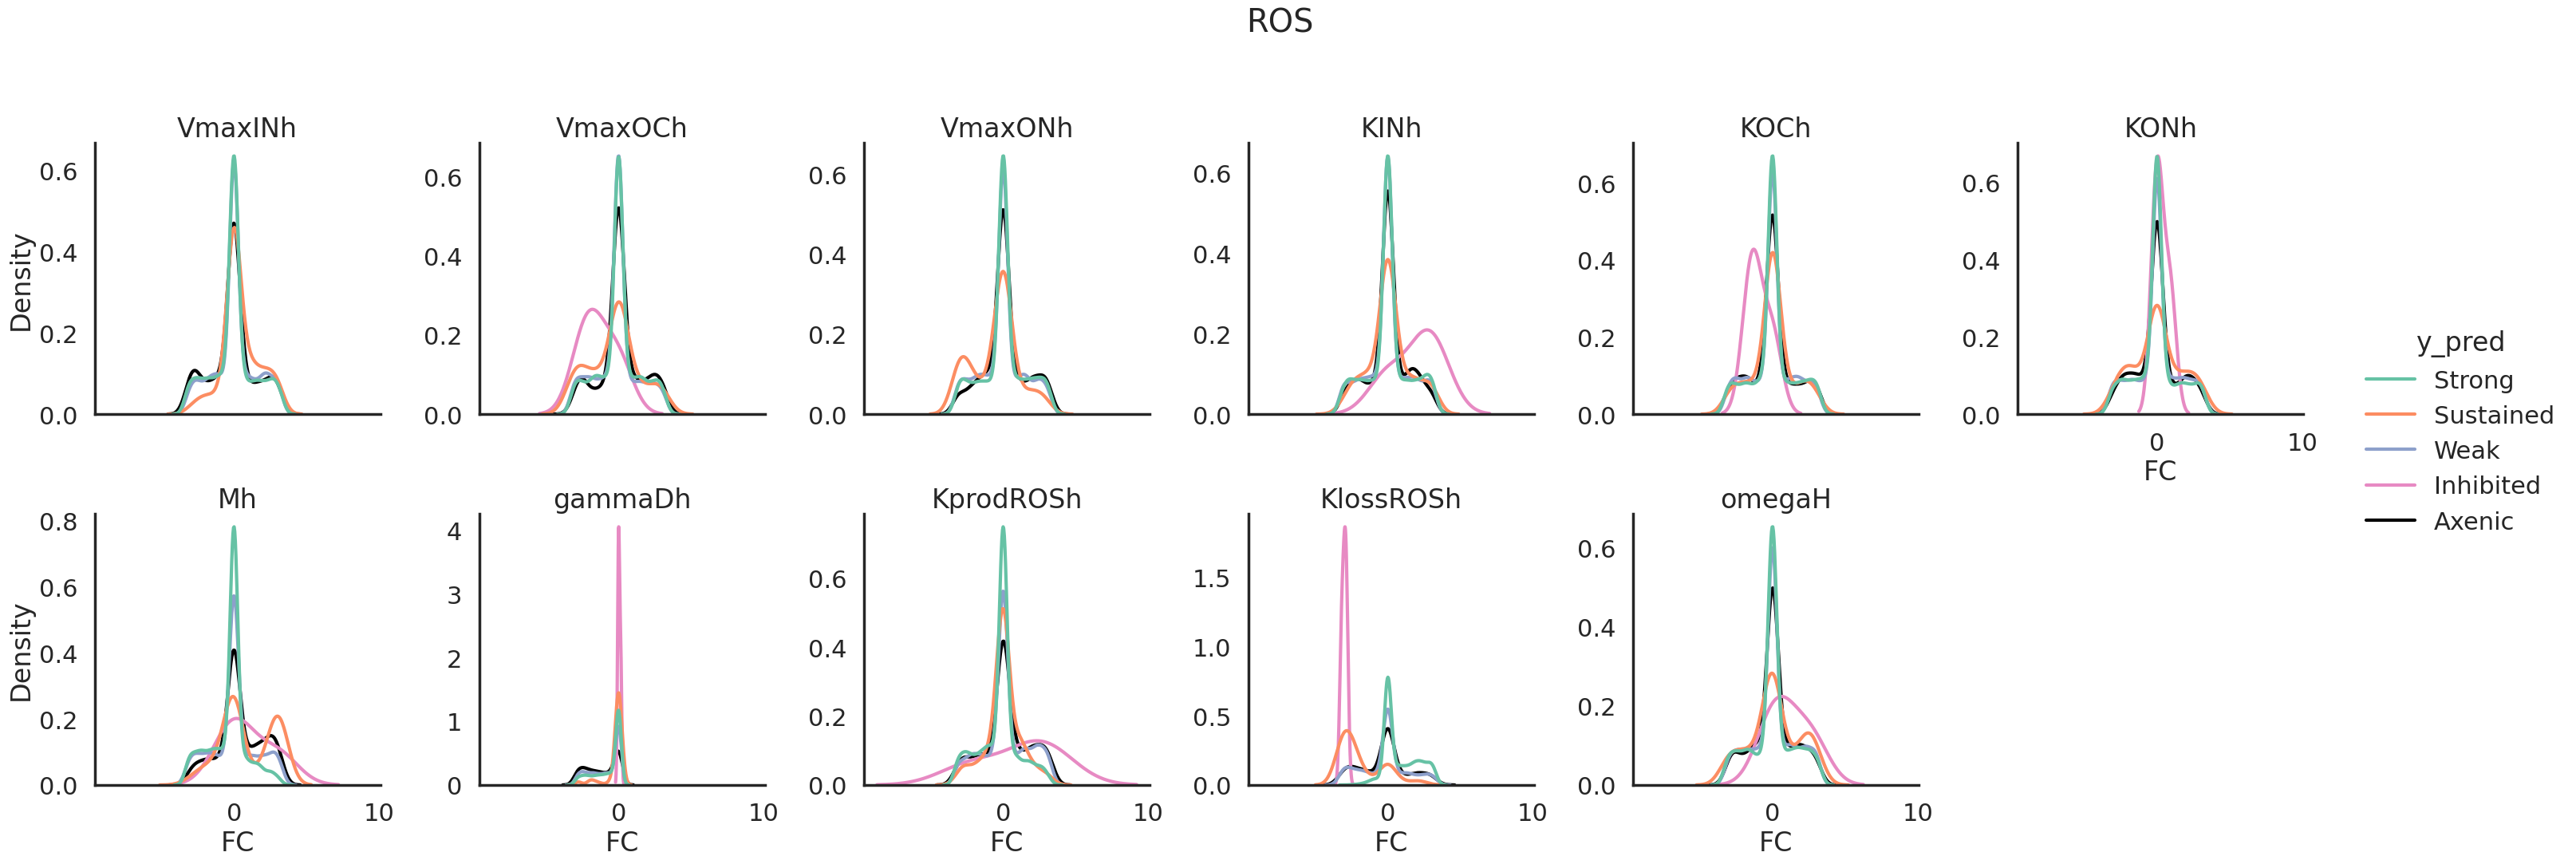

In [51]:
sns.set_context('poster')
mparams_df['y_pred_'] = pd.Categorical(mparams_df['y_pred'], gorder)
for model in morder:
    cur_het_params_to_update, min_het_bounds, min_het_log_params = get_param_tuning_values(model, 'HET')
    cur_pro_params_to_update, min_pro_bounds, min_pro_log_params = get_param_tuning_values(model, 'PRO')
    sns.displot(
        data=mparams_df.loc[ 
            ~mparams_df['FC'].isna() & 
            mparams_df['variable'].isin(cur_het_params_to_update) &
            mparams_df['model'].isin([model]) #&
            #mparams_df['Versatility'].isin(['Versatile']) 
            

                           ].reset_index(), 
        col='variable', x='FC', col_wrap=6, #order=gorder,
        hue='y_pred', hue_order=gorder, palette=gpalette, kind='kde',common_norm=False, 
        facet_kws=dict(sharey=False),
        #y= 'y_pred_',
        col_order=cur_het_params_to_update,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(model, y=1.1)